# "y = x + 10"

- badges: true
- comments: true
- categories: [Neural-Network, Regression, machine_learning, tensorflow, ml_model]
- hide: false
- author: Atiq Urrehaman
- search_exclude: false

In [1]:
import tensorflow as tf

In [2]:

# Create the input
X = tf.range(-2000.0, 2000.0, 3)
X

<tf.Tensor: shape=(1334,), dtype=float32, numpy=array([-2000., -1997., -1994., ...,  1993.,  1996.,  1999.], dtype=float32)>

In [3]:
# creating the labels

y = X + 10
y

<tf.Tensor: shape=(1334,), dtype=float32, numpy=array([-1990., -1987., -1984., ...,  2003.,  2006.,  2009.], dtype=float32)>

In [4]:
# Visualize the data

import plotly.express as px

fig = px.scatter(x=X, y=y)
fig.show()

### Spliting the Data into [Train, Validation and Test Set]

In [5]:
# Check the length of X and y
len(X), len(y)

(1334, 1334)

In [6]:
# Spliting the Input data set

X_train = X[:934]

X_validation = X[934:1134]

X_test = X[1134:]

len(X_train), len(X_validation), len(X_test)

(934, 200, 200)

In [7]:
# Spliting the Label data set

y_train = y[:934]

y_validation = y[934:1134]

y_test = y[1134:]

len(y_train), len(y_validation), len(y_test)

(934, 200, 200)

In [8]:
# check the order

y_train == X_train + 10

y_validation == X_validation + 10

y_test == X_test + 10

<tf.Tensor: shape=(200,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

### Visualizing the split data

In [9]:
fig = px.scatter()


fig.add_scatter(
    x=X_train,
    y=y_train,
    name="Training Data"

)

fig.add_scatter(
    x=X_validation,
    y=y_validation,
    name="Validation Data",
)

fig.add_scatter(
    x=X_test,
    y=y_test,
    name="Test Data"
)

fig.show()


### Create the model

In [10]:
# set the random seed
tf.random.set_seed(5)


# 1. Create the Model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(60, input_shape=[1], activation="relu", name="input_layer_1"),
        tf.keras.layers.Dense(50, name="input_layer_2"),
        tf.keras.layers.Dense(1, name="Output_Layer")
    ],
    name="yx10"
)

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)


### Visualizing the model

In [11]:
model.summary()

Model: "yx10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer_1 (Dense)        (None, 60)                120       
_________________________________________________________________
input_layer_2 (Dense)        (None, 50)                3050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


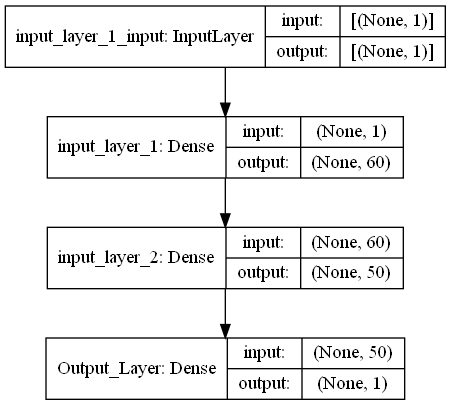

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Fitting the model y = x + 10

In [13]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

### Evaluating the model

In [14]:
model.evaluate(X_validation, y_validation)

7/7 [==============================] - 0s 2ms/step - loss: 0.0982 - mae: 0.0982


[0.09822601079940796, 0.09822601079940796]

### Predicting the Value

In [15]:
y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1411.8947, 1414.8945, 1417.8945, 1420.8947, 1423.8945, 1426.8942,
       1429.8943, 1432.8942, 1435.8943, 1438.894 , 1441.894 , 1444.894 ,
       1447.8938, 1450.8937, 1453.8937, 1456.8937, 1459.8937, 1462.8936,
       1465.8933, 1468.8934, 1471.8932, 1474.8933, 1477.8931, 1480.8932,
       1483.8931, 1486.8931, 1489.8928, 1492.8928, 1495.8928, 1498.8927,
       1501.8925, 1504.8926, 1507.8923, 1510.8925, 1513.8923, 1516.8922,
       1519.8921, 1522.8921, 1525.8922, 1528.8921, 1531.8918, 1534.8921,
       1537.8917, 1540.8917, 1543.8915, 1546.8916, 1549.8916, 1552.8915,
       1555.8912, 1558.8914, 1561.8911, 1564.8912, 1567.891 , 1570.8909,
       1573.8909, 1576.8909, 1579.891 , 1582.8907, 1585.8905, 1588.8906,
       1591.8904, 1594.8906, 1597.8904, 1600.8903, 1603.8903, 1606.89  ,
       1609.89  , 1612.89  , 1615.8899, 1618.89  , 1621.8896, 1624.8899,
       1627.8898, 1630.8896, 1633.8896, 1636.8894, 1639.8893, 1642.8894,
   

### Plotting the Prediction

In [16]:
fig = px.scatter()


fig.add_scatter(
    x=X_train,
    y=y_train,
    name="Training Data"

)

fig.add_scatter(
    x=X_validation,
    y=y_validation,
    name="Validation Data",
)

fig.add_scatter(
    x=X_test,
    y=y_test,
    name="Test Data"
)

fig.add_scatter(
    x=X_test,
    y=y_pred,
    name="Predictions"
)

fig.show()


### Saving the model

In [17]:
# saving the model in HDF5 format

if "E:\workspace\streamlit\ymc.h5"==False:
    model.save("E:\workspace\streamlit\ymc.h5")

In [18]:
# import csv

# # field names
# fields = ['ID', 'X', 'y']

# rows=[]
# for j,i in enumerate(range(-2000, 2000, 3), start=1):
#     # data rows of csv file
#     rows += [ [j, float(i), float(i+10) ]]

# # name of csv file
# filename = "y=x+10.csv"

# # writing to csv file
# with open(filename, 'w') as csvfile:
#     # creating a csv writer object
#     csvwriter = csv.writer(csvfile)

#     # writing the fields
#     csvwriter.writerow(fields)

#     # writing the data rows
#     csvwriter.writerows(rows)

### How to convert the model into `Layer API`

In [19]:
# saving the model into Layer API format using the `tensorflowjs`
import tensorflowjs as tfjs

if "E:\workspace\Data_Process\model"==False:
    tfjs.converters.save_keras_model(model, "E:\workspace\Data_Process\model")